# Topic Modeling (Top)

In [50]:
# General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# NLP
import spacy
import emoji
import re
from wordcloud import WordCloud

In [51]:
nlp = spacy.load("en_core_web_lg")

In [52]:
# Load the dataset
df = pd.read_csv('data/MHPH_top.csv')
print(df.shape)
df.head()

(998, 11)


,title,num_comments,text,id,author,created_utc,score,upvote_ratio,url,flair,type
0,List of Centers Offering Free Online Psych Ser...,43,NaN,nryig4,Pyjamaface,1.622789e+09,571,1.00,https://www.reddit.com/gallery/nryig4,INFORMATION,top
1,"Laban us, mga beshy! Meme is sometimes the ans...",4,NaN,kh4svm,bam03_,1.608506e+09,337,1.00,https://i.redd.it/c5l0pfsxdf661.jpg,INSPIRATIONAL,top
2,List of Suggested PH-based Psychologists/Psych...,358,#Congratulations on making the first step on y...,vu31vp,groundbreakingswan24,1.657258e+09,323,1.00,https://www.reddit.com/r/MentalHealthPH/commen...,META,top
3,Like legit. Ang mahal maging mentally stable hehe,40,NaN,11d2fm2,mikael-kun,1.677471e+09,273,0.99,https://i.redd.it/d3bpqn1p7pka1.jpg,DISCUSSION,top
4,I compiled some information for those looking ...,36,"Since a lot of people are looking for psychs, ...",l0jnxs,gothicblossoms,1.611062e+09,250,1.00,https://www.reddit.com/r/MentalHealthPH/commen...,INFORMATION,top


# Cleaning text column

In [53]:
clean_df = df.copy()

## Translate to Filipino

In [54]:
#from translate import Translator # NOT WORKING

#translator = Translator(from_lang='tl', to_lang='en')

# Create an empty list to store the translated text
#translated_text = []

# Iterate over the rows of the column
#for index, row in df.iterrows():
    # Translate each text using the translator
 #   translation = translator.translate(str(row['text']))
    # Append the translated text to the list
  #  translated_text.append(translation)

# Create a new column in the DataFrame to store the translated text
#clean_df['text'] = translated_text

# Print the DataFrame with the translated text
#print(clean_df)

Remove Filipino stopwords

In [55]:
# Remove Filipino stopwords (applied after cleaning functions)

def load_custom_stopwords(file_path):
    with open(file_path, 'r') as file:
        stopwords = [word.strip() for word in file.readlines()]
    return stopwords

In [56]:
stopwords_tl = load_custom_stopwords('stopwords_tl.txt')

In [57]:
def remove_stopwords_tl(text):
    doc = nlp(text)
    filtered_words = [token.text for token in doc if token.text not in stopwords_tl]
    return ' '.join(filtered_words)

## Cleaning

In [58]:
def expand_contractions(text):
    result = text
    
    contractions = {
        "ain't": "am not / are not",
        "aren't": "are not / am not",
        "can't": "cannot",
        "can't've": "cannot have",
        "'cause": "because",
        "could've": "could have",
        "couldn't": "could not",
        "couldn't've": "could not have",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hadn't've": "had not have",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he had / he would",
        "he'd've": "he would have",
        "he'll": "he shall / he will",
        "he'll've": "he shall have / he will have",
        "he's": "he has / he is",
        "how'd": "how did",
        "how'd'y": "how do you",
        "how'll": "how will",
        "how's": "how has / how is",
        "i'd": "I had / I would",
        "i'd've": "I would have",
        "i'll": "I shall / I will",
        "i'll've": "I shall have / I will have",
        "i'm": "I am",
        "i've": "I have",
        "isn't": "is not",
        "it'd": "it had / it would",
        "it'd've": "it would have",
        "it'll": "it shall / it will",
        "it'll've": "it shall have / it will have",
        "it's": "it has / it is",
        "let's": "let us",
        "ma'am": "madam",
        "mayn't": "may not",
        "might've": "might have",
        "mightn't": "might not",
        "mightn't've": "might not have",
        "must've": "must have",
        "mustn't": "must not",
        "mustn't've": "must not have",
        "needn't": "need not",
        "needn't've": "need not have",
        "o'clock": "of the clock",
        "oughtn't": "ought not",
        "oughtn't've": "ought not have",
        "shan't": "shall not",
        "sha'n't": "shall not",
        "shan't've": "shall not have",
        "she'd": "she had / she would",
        "she'd've": "she would have",
        "she'll": "she shall / she will",
        "she'll've": "she shall have / she will have",
        "she's": "she has / she is",
        "should've": "should have",
        "shouldn't": "should not",
        "shouldn't've": "should not have",
        "so've": "so have",
        "so's": "so as / so is",
        "that'd": "that would / that had",
        "that'd've": "that would have",
        "that's": "that has / that is",
        "there'd": "there had / there would",
        "there'd've": "there would have",
        "there's": "there has / there is",
        "they'd": "they had / they would",
        "they'd've": "they would have",
        "they'll": "they shall / they will",
        "they'll've": "they shall have / they will have",
        "they're": "they are",
        "they've": "they have",
        "to've": "to have",
        "wasn't": "was not",
        "we'd": "we had / we would",
        "we'd've": "we would have",
        "we'll": "we will",
        "we'll've": "we will have",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what shall / what will",
        "what'll've": "what shall have / what will have",
        "what're": "what are",
        "what's": "what has / what is",
        "what've": "what have",
        "when's": "when has / when is",
        "when've": "when have",
        "where'd": "where did",
        "where's": "where has / where is",
        "where've": "where have",
        "who'll": "who shall / who will",
        "who'll've": "who shall have / who will have",
        "who's": "who has / who is",
        "who've": "who have",
        "why's": "why has / why is",
        "why've": "why have",
        "will've": "will have",
        "won't": "will not",
        "won't've": "will not have",
        "would've": "would have",
        "wouldn't": "would not",
        "wouldn't've": "would not have",
        "y'all": "you all",
        "y'all'd": "you all would",
        "y'all'd've": "you all would have",
        "y'all're": "you all are",
        "y'all've": "you all have",
        "you'd": "you had / you would",
        "you'd've": "you would have",
        "you'll": "you shall / you will",
        "you'll've": "you shall have / you will have",
        "you're": "you are",
        "you've": "you have"
    }
    
    for word in result.split():
        if word in contractions:
            result = result.replace(word, contractions[word])

    return result

In [59]:
import unicodedata

def remove_accents(text):
    return ''.join(char for char in unicodedata.normalize('NFD', text)
                   if unicodedata.category(char) != 'Mn')

In [60]:
def remove_emoji(text):
    return emoji.replace_emoji(text, '')

In [61]:
def remove_hashtags(text):
    return re.sub(r'[＃#](\w+)', " ", text)

In [62]:
def remove_mentions(text):
    return re.sub('@([a-zA-Z0-9]{1,15})', ' ', text)

In [63]:
def remove_hyperlinks(text):
    return re.sub('<[^>]+>', ' ', text)

In [64]:
def remove_links(text):
    return re.sub('https://t.co/.+', " ", text)

In [65]:
def remove_numbers(text):
    return re.sub('[^a-zA-Z]', ' ', text)

In [66]:
def remove_extra_white_spaces(text):
    return re.sub('\s+', ' ', text)

In [67]:
# Save cleaning functions
cleaning_functions = [
    remove_links,
    expand_contractions,
    remove_accents,
    remove_emoji, 
    remove_hashtags, 
    remove_mentions,
    remove_hyperlinks,
    remove_numbers,
    remove_extra_white_spaces,
]

In [68]:
# case folding
clean_df['text'] = clean_df['text'].str.lower()
clean_df.head()

,title,num_comments,text,id,author,created_utc,score,upvote_ratio,url,flair,type
0,List of Centers Offering Free Online Psych Ser...,43,NaN,nryig4,Pyjamaface,1.622789e+09,571,1.00,https://www.reddit.com/gallery/nryig4,INFORMATION,top
1,"Laban us, mga beshy! Meme is sometimes the ans...",4,NaN,kh4svm,bam03_,1.608506e+09,337,1.00,https://i.redd.it/c5l0pfsxdf661.jpg,INSPIRATIONAL,top
2,List of Suggested PH-based Psychologists/Psych...,358,#congratulations on making the first step on y...,vu31vp,groundbreakingswan24,1.657258e+09,323,1.00,https://www.reddit.com/r/MentalHealthPH/commen...,META,top
3,Like legit. Ang mahal maging mentally stable hehe,40,NaN,11d2fm2,mikael-kun,1.677471e+09,273,0.99,https://i.redd.it/d3bpqn1p7pka1.jpg,DISCUSSION,top
4,I compiled some information for those looking ...,36,"since a lot of people are looking for psychs, ...",l0jnxs,gothicblossoms,1.611062e+09,250,1.00,https://www.reddit.com/r/MentalHealthPH/commen...,INFORMATION,top


In [69]:
# Apply cleaning functions

for func in cleaning_functions:
    clean_df['text'] = clean_df.apply(lambda x: func(str(x['text'])), axis=1)

# Drop duplicates and na
clean_df.drop_duplicates(subset=['text'], inplace=True)
clean_df.dropna(subset=['text'], inplace=True)

# Reset the Index
clean_df = clean_df.reset_index(drop=True)

clean_df

,title,num_comments,text,id,author,created_utc,score,upvote_ratio,url,flair,type
0,List of Centers Offering Free Online Psych Ser...,43,nan,nryig4,Pyjamaface,1.622789e+09,571,1.00,https://www.reddit.com/gallery/nryig4,INFORMATION,top
1,List of Suggested PH-based Psychologists/Psych...,358,on making the first step on your road to reco...,vu31vp,groundbreakingswan24,1.657258e+09,323,1.00,https://www.reddit.com/r/MentalHealthPH/commen...,META,top
2,I compiled some information for those looking ...,36,since a lot of people are looking for psychs i...,l0jnxs,gothicblossoms,1.611062e+09,250,1.00,https://www.reddit.com/r/MentalHealthPH/commen...,INFORMATION,top
3,FINALLY GOT HIRED AFTER BEING UNEMPLOYED FOR 3...,40,even if I am super anxious to accept the job b...,j6t46u,Fentanyl223,1.602085e+09,248,1.00,https://www.reddit.com/r/MentalHealthPH/commen...,INSPIRATIONAL,top
4,"[21F] Planned suicide, went to ER, sent to psy...",20,tw suicide posting this here and hoping this w...,vzhxj4,ilurv,1.657867e+09,222,0.99,https://www.reddit.com/r/MentalHealthPH/commen...,STORY,top
...,...,...,...,...,...,...,...,...,...,...,...
825,Does anybody else feel like they wouldnt do an...,15,i do not mean to be a debbie downer this new y...,eijouq,nobodyshere000,1.577894e+09,18,0.87,https://www.reddit.com/r/MentalHealthPH/commen...,NSFW,top
826,Does commuting affect your mental health?,1,do you commute long hours to work or school ar...,e0ao8u,kn1212s,1.574471e+09,17,0.86,https://www.reddit.com/r/MentalHealthPH/commen...,SURVEY,top
827,EXPRESS YOURSELF. DO NOT REPRESS,0,for any person here who wants an avenue to exp...,b22n2r,gennoboy,1.552806e+09,19,0.93,https://www.reddit.com/r/MentalHealthPH/commen...,NaN,top
828,One of the worst part of mental health issues ...,21,after years of overachieving burnout hit me li...,13cjbgu,themaninthecloud,1.683620e+09,18,0.95,https://www.reddit.com/r/MentalHealthPH/commen...,DISCUSSION,top


In [70]:
text_df = clean_df.copy()

In [22]:
# Remove Filipino stopwords
clean_df['text'] = clean_df.apply(lambda x: remove_stopwords_tl(x['text']), axis=1)
clean_df.head()

,title,num_comments,text,id,author,created_utc,score,upvote_ratio,url,flair,type
0,List of Centers Offering Free Online Psych Ser...,43,nan,nryig4,Pyjamaface,1.622789e+09,571,1.00,https://www.reddit.com/gallery/nryig4,INFORMATION,top
1,List of Suggested PH-based Psychologists/Psych...,358,on making the first step on your road to rec...,vu31vp,groundbreakingswan24,1.657258e+09,323,1.00,https://www.reddit.com/r/MentalHealthPH/commen...,META,top
2,I compiled some information for those looking ...,36,since a lot of people are looking for psychs i...,l0jnxs,gothicblossoms,1.611062e+09,250,1.00,https://www.reddit.com/r/MentalHealthPH/commen...,INFORMATION,top
3,FINALLY GOT HIRED AFTER BEING UNEMPLOYED FOR 3...,40,even if I super anxious to accept the job beca...,j6t46u,Fentanyl223,1.602085e+09,248,1.00,https://www.reddit.com/r/MentalHealthPH/commen...,INSPIRATIONAL,top
4,"[21F] Planned suicide, went to ER, sent to psy...",20,tw suicide posting this here and hoping this w...,vzhxj4,ilurv,1.657867e+09,222,0.99,https://www.reddit.com/r/MentalHealthPH/commen...,STORY,top


In [23]:
def final_clean(text):
    '''
    Removes stop words
    Removes single characters
    Tokenizes and lemmatizes text
    '''
    doc = nlp(text)

    li = []
    for token in doc:
        if not token.is_stop and not len(token.text) == 1:
            li.append(token.lemma_)

    return li

In [24]:
clean_df['text'] = clean_df.apply(lambda x: final_clean(x['text']), axis=1)

In [25]:
clean_df.head()

,title,num_comments,text,id,author,created_utc,score,upvote_ratio,url,flair,type
0,List of Centers Offering Free Online Psych Ser...,43,[nan],nryig4,Pyjamaface,1.622789e+09,571,1.00,https://www.reddit.com/gallery/nryig4,INFORMATION,top
1,List of Suggested PH-based Psychologists/Psych...,358,"[ , make, step, road, recovery, sort, comment...",vu31vp,groundbreakingswan24,1.657258e+09,323,1.00,https://www.reddit.com/r/MentalHealthPH/commen...,META,top
2,I compiled some information for those looking ...,36,"[lot, people, look, psychs, compile, list, off...",l0jnxs,gothicblossoms,1.611062e+09,250,1.00,https://www.reddit.com/r/MentalHealthPH/commen...,INFORMATION,top
3,FINALLY GOT HIRED AFTER BEING UNEMPLOYED FOR 3...,40,"[super, anxious, accept, job, unemployed, long...",j6t46u,Fentanyl223,1.602085e+09,248,1.00,https://www.reddit.com/r/MentalHealthPH/commen...,INSPIRATIONAL,top
4,"[21F] Planned suicide, went to ER, sent to psy...",20,"[tw, suicide, post, hope, encourage, seek, hel...",vzhxj4,ilurv,1.657867e+09,222,0.99,https://www.reddit.com/r/MentalHealthPH/commen...,STORY,top


### Remove common words

In [26]:
from collections import Counter

In [27]:
from collections import Counter

# Get the tokenized text from the column
tokenized_text = clean_df['text']

# Flatten the list of tokenized text into a single list
all_tokens = [token for sublist in tokenized_text for token in sublist]

# Count the occurrences of each word
word_counts = Counter(all_tokens)

# Get the most common words and their frequencies
most_common = word_counts.most_common(10)

# Print the most common words
for word, freq in most_common:
    print(f"Word: {word}, Frequency: {freq}")


Word: feel, Frequency: 813
Word: like, Frequency: 635
Word: time, Frequency: 527
Word: know, Frequency: 526
Word: want, Frequency: 523
Word: think, Frequency: 442
Word: help, Frequency: 406
Word: people, Frequency: 375
Word: work, Frequency: 366
Word: mental, Frequency: 357


In [28]:
most_common_words = [word for word, _ in most_common]
most_common_words

['feel',
 'like',
 'time',
 'know',
 'want',
 'think',
 'help',
 'people',
 'work',
 'mental']

In [29]:
def remove_common(tokenized_text):
    filtered_words = [token for token in tokenized_text if token not in most_common_words]
    return filtered_words

In [30]:
clean_df['text'] = clean_df.apply(lambda x: remove_common(x['text']), axis=1)
clean_df.head()

,title,num_comments,text,id,author,created_utc,score,upvote_ratio,url,flair,type
0,List of Centers Offering Free Online Psych Ser...,43,[nan],nryig4,Pyjamaface,1.622789e+09,571,1.00,https://www.reddit.com/gallery/nryig4,INFORMATION,top
1,List of Suggested PH-based Psychologists/Psych...,358,"[ , make, step, road, recovery, sort, comment...",vu31vp,groundbreakingswan24,1.657258e+09,323,1.00,https://www.reddit.com/r/MentalHealthPH/commen...,META,top
2,I compiled some information for those looking ...,36,"[lot, look, psychs, compile, list, offer, onli...",l0jnxs,gothicblossoms,1.611062e+09,250,1.00,https://www.reddit.com/r/MentalHealthPH/commen...,INFORMATION,top
3,FINALLY GOT HIRED AFTER BEING UNEMPLOYED FOR 3...,40,"[super, anxious, accept, job, unemployed, long...",j6t46u,Fentanyl223,1.602085e+09,248,1.00,https://www.reddit.com/r/MentalHealthPH/commen...,INSPIRATIONAL,top
4,"[21F] Planned suicide, went to ER, sent to psy...",20,"[tw, suicide, post, hope, encourage, seek, sui...",vzhxj4,ilurv,1.657867e+09,222,0.99,https://www.reddit.com/r/MentalHealthPH/commen...,STORY,top


In [31]:
random_words = ['hehe', 'heheh', 'hehehe', 'zaa', 'gsiurnonylvj', 'hi', 'gniigqa', 'xauqr', 'aoh', 've']

In [32]:
def remove_random(tokenized_text) :
    filtered_words = [token for token in tokenized_text if token not in random_words]
    return filtered_words

In [33]:
clean_df['text'] = clean_df.apply(lambda x: remove_random(x['text']), axis=1)

In [34]:
clean_df

,title,num_comments,text,id,author,created_utc,score,upvote_ratio,url,flair,type
0,List of Centers Offering Free Online Psych Ser...,43,[nan],nryig4,Pyjamaface,1.622789e+09,571,1.00,https://www.reddit.com/gallery/nryig4,INFORMATION,top
1,List of Suggested PH-based Psychologists/Psych...,358,"[ , make, step, road, recovery, sort, comment...",vu31vp,groundbreakingswan24,1.657258e+09,323,1.00,https://www.reddit.com/r/MentalHealthPH/commen...,META,top
2,I compiled some information for those looking ...,36,"[lot, look, psychs, compile, list, offer, onli...",l0jnxs,gothicblossoms,1.611062e+09,250,1.00,https://www.reddit.com/r/MentalHealthPH/commen...,INFORMATION,top
3,FINALLY GOT HIRED AFTER BEING UNEMPLOYED FOR 3...,40,"[super, anxious, accept, job, unemployed, long...",j6t46u,Fentanyl223,1.602085e+09,248,1.00,https://www.reddit.com/r/MentalHealthPH/commen...,INSPIRATIONAL,top
4,"[21F] Planned suicide, went to ER, sent to psy...",20,"[tw, suicide, post, hope, encourage, seek, sui...",vzhxj4,ilurv,1.657867e+09,222,0.99,https://www.reddit.com/r/MentalHealthPH/commen...,STORY,top
...,...,...,...,...,...,...,...,...,...,...,...
825,Does anybody else feel like they wouldnt do an...,15,"[mean, debbie, downer, new, year, anybody, way...",eijouq,nobodyshere000,1.577894e+09,18,0.87,https://www.reddit.com/r/MentalHealthPH/commen...,NSFW,top
826,Does commuting affect your mental health?,1,"[commute, long, hour, school, sick, find, ther...",e0ao8u,kn1212s,1.574471e+09,17,0.86,https://www.reddit.com/r/MentalHealthPH/commen...,SURVEY,top
827,EXPRESS YOURSELF. DO NOT REPRESS,0,"[person, avenue, express, create, facebook, pa...",b22n2r,gennoboy,1.552806e+09,19,0.93,https://www.reddit.com/r/MentalHealthPH/commen...,NaN,top
828,One of the worst part of mental health issues ...,21,"[year, overachieve, burnout, hit, truck, troub...",13cjbgu,themaninthecloud,1.683620e+09,18,0.95,https://www.reddit.com/r/MentalHealthPH/commen...,DISCUSSION,top


# Topic Modeling

In [35]:
from gensim import corpora

In [36]:
dictionary = corpora.Dictionary(clean_df['text'])
corpus_to_bow = [dictionary.doc2bow(document) for document in clean_df['text'].values]

In [37]:
from gensim.models import CoherenceModel

## LDA - All

In [36]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim.models import LdaModel

### Hypertuning for number of topics

In [37]:
random_seed = 30
np.random.seed(random_seed)

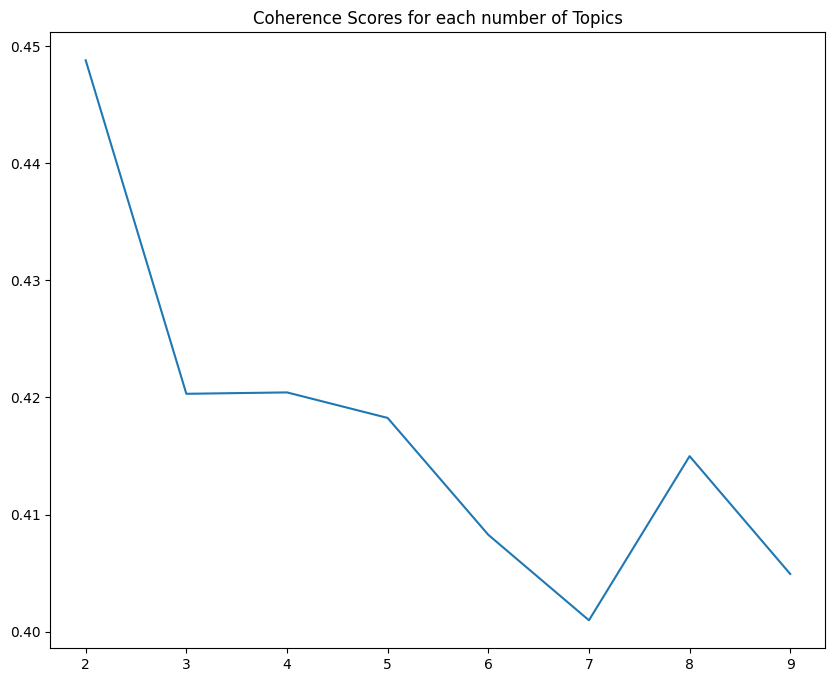

In [40]:
scores = []

for num_topics in range(2, 10):
    np.random.seed(random_seed)
    model = LdaModel(corpus_to_bow, num_topics, dictionary)
    coherence_score = CoherenceModel(model=model, texts=clean_df['text'], dictionary=dictionary).get_coherence()
    scores.append(coherence_score)

plt.figure(figsize=(10, 8))
plt.plot(range(2, 10), scores)
plt.title("Coherence Scores for each number of Topics")
plt.show()

In [48]:
# Set number of topics
num_topics = 8

### Modeling

In [49]:
model_lda = LdaModel(corpus_to_bow, num_topics, dictionary)
model_lda.print_topics()

[(0,
  '0.006*"day" + 0.006*"thing" + 0.006*"try" + 0.005*"bad" + 0.005*"anxiety" + 0.005*"thought" + 0.005*"get" + 0.004*"go" + 0.004*"life" + 0.004*"stop"'),
 (1,
  '0.010*"need" + 0.007*"thing" + 0.006*"tell" + 0.006*"good" + 0.006*"life" + 0.005*"friend" + 0.005*"depression" + 0.005*"go" + 0.005*"get" + 0.004*"start"'),
 (2,
  '0.009*"mental" + 0.008*"friend" + 0.007*"health" + 0.006*"try" + 0.006*"thing" + 0.005*"day" + 0.005*"life" + 0.004*"ask" + 0.004*"talk" + 0.004*"way"'),
 (3,
  '0.007*"mental" + 0.006*"tell" + 0.006*"try" + 0.005*"talk" + 0.005*"friend" + 0.005*"health" + 0.004*"month" + 0.004*"day" + 0.004*"anxiety" + 0.004*"start"'),
 (4,
  '0.007*"day" + 0.006*"try" + 0.006*"life" + 0.005*"family" + 0.005*"friend" + 0.004*"tell" + 0.004*"bad" + 0.004*"go" + 0.004*"thing" + 0.004*"say"'),
 (5,
  '0.006*"thing" + 0.005*"day" + 0.005*"good" + 0.005*"try" + 0.005*"go" + 0.005*"doctor" + 0.004*"mental" + 0.004*"not" + 0.004*"health" + 0.004*"tell"'),
 (6,
  '0.007*"day" + 0.0

In [50]:
coherence_model_lda = CoherenceModel(model=model_lda, texts=clean_df['text'], dictionary=dictionary)
print("Coherence Score: ", coherence_model_lda.get_coherence())

Coherence Score:  0.4090485922312872


In [61]:
vis_lda = gensimvis.prepare(model_lda, corpus_to_bow, dictionary)
pyLDAvis.display(vis_lda)

### Wordclouds for topics

C:\Users\XIAOMI\Documents\EskwelabsDSF11\Capstone\venvcap\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


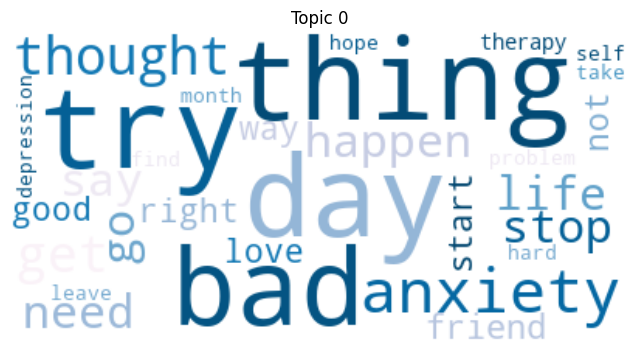

C:\Users\XIAOMI\Documents\EskwelabsDSF11\Capstone\venvcap\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


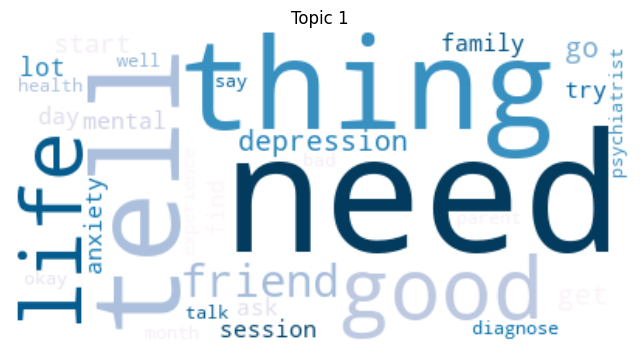

C:\Users\XIAOMI\Documents\EskwelabsDSF11\Capstone\venvcap\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


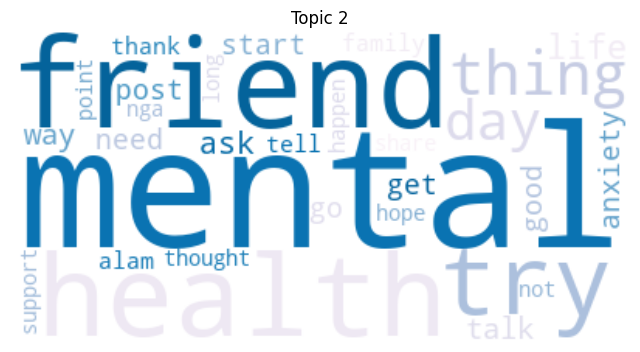

C:\Users\XIAOMI\Documents\EskwelabsDSF11\Capstone\venvcap\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


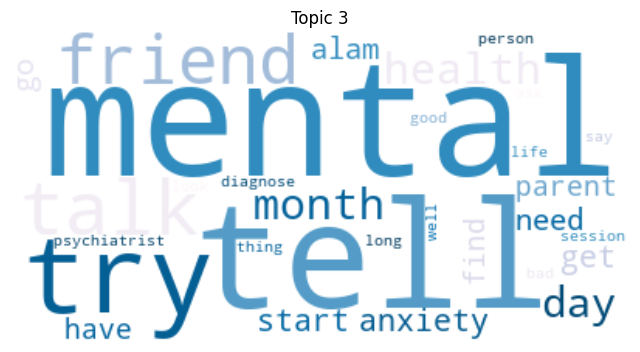

C:\Users\XIAOMI\Documents\EskwelabsDSF11\Capstone\venvcap\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


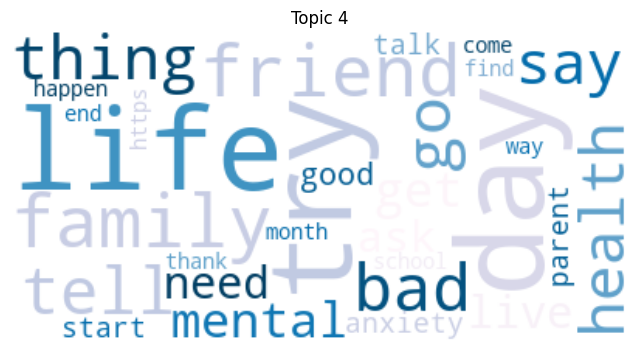

C:\Users\XIAOMI\Documents\EskwelabsDSF11\Capstone\venvcap\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


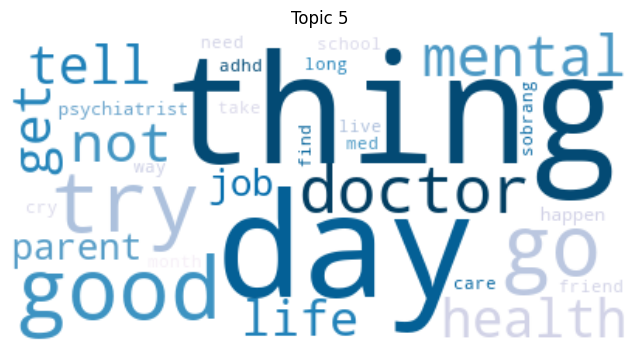

C:\Users\XIAOMI\Documents\EskwelabsDSF11\Capstone\venvcap\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


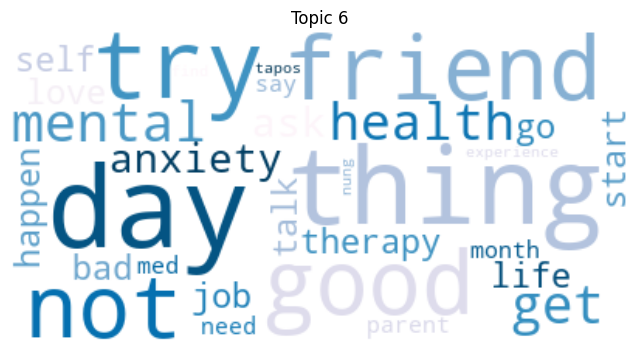

C:\Users\XIAOMI\Documents\EskwelabsDSF11\Capstone\venvcap\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


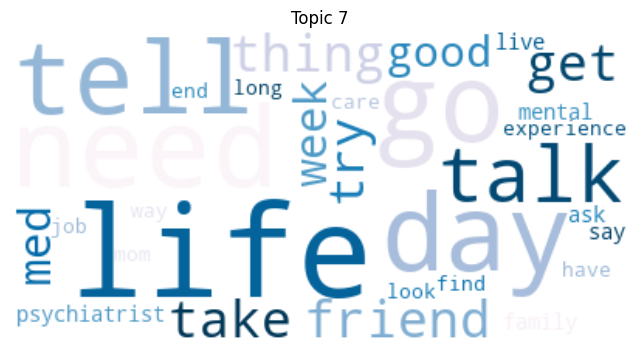

In [51]:
# Get the most probable words for each topic
topics = model_lda.show_topics(num_topics=num_topics, num_words=30, formatted=False)

# Create a word cloud for each topic
for topic_id, topic_words in topics:
    # Create a word cloud object
    wordcloud = WordCloud(background_color='white', colormap='PuBu')

    # Generate the word cloud from the topic words
    wordcloud.generate_from_frequencies(dict(topic_words))

    # Plot the word cloud
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_id}') #remove later
    plt.axis('off')

    # Show the plot
    plt.show()


### Topic assignment and distribution

In [ ]:
# Initialize an empty list to store the assigned topics
assigned_topics = []

# Iterate over each document in the corpus
for doc in corpus_to_bow:
    # Get the topic distribution for the document
    topics = model_lda.get_document_topics(doc)
    
    # Sort the topics by their probability in descending order
    sorted_topics = sorted(topics, key=lambda x: x[1], reverse=True)
    
    # Get the topic with the highest probability (top assigned topic)
    top_topic = sorted_topics[0][0]
    
    # Append the top topic to the list
    assigned_topics.append(top_topic)

# Add the assigned topics as a new column to your DataFrame
clean_df['Topic'] = assigned_topics

# Print the resulting DataFrame
clean_df


### Saving and loading model

In [52]:
import pickle

# Save the trained HDA model
model_lda.save('lda_overall.pkl')

In [ ]:
#import pickle

# Load the trained HDA model
model_lda = HdpModel.load('lda_overall.pkl')

## HDP - All

In [38]:
from gensim.models import HdpModel

In [41]:
model_hdp = HdpModel(corpus_to_bow, dictionary, T=5)
model_hdp.print_topics()

[(0,
  '0.001*dog + 0.001*outlier + 0.001*attendance + 0.001*cptsd + 0.001*spiritually + 0.001*pinagdadamutan + 0.001*tell + 0.001*thick + 0.001*go + 0.001*pagbabago'),
 (1,
  '0.001*lumaki + 0.001*naiyak + 0.001*percent + 0.001*discuss + 0.001*narin + 0.001*underachiever + 0.001*company + 0.001*db + 0.001*enroll + 0.001*hesitant'),
 (2,
  '0.001*bleak + 0.001*plant + 0.001*religiosity + 0.001*divalproex + 0.001*nagsasalita + 0.001*hinihingan + 0.001*lot + 0.001*training + 0.001*bawas + 0.001*life'),
 (3,
  '0.001*electric + 0.001*dependent + 0.001*kakaisip + 0.001*deal + 0.001*nagmmy + 0.001*qoute + 0.001*vote + 0.001*future + 0.001*fighting + 0.001*appropriate'),
 (4,
  '0.001*pjf + 0.001*naiyak + 0.001*syllabus + 0.001*gumagaling + 0.001*mind + 0.001*sadly + 0.001*maexpose + 0.001*mang + 0.001*liturgy + 0.001*uusap')]

In [43]:
coherence_model_hdp = CoherenceModel(model=model_hdp, texts=clean_df['text'], dictionary=dictionary)
print("Coherence Score: ", coherence_model_hdp.get_coherence())

Coherence Score:  0.7396081583661761


### Wordclouds for topics

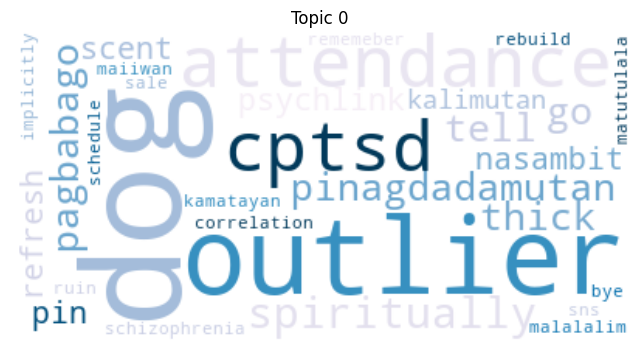

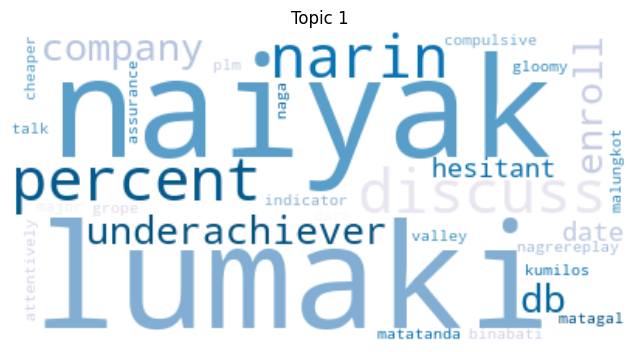

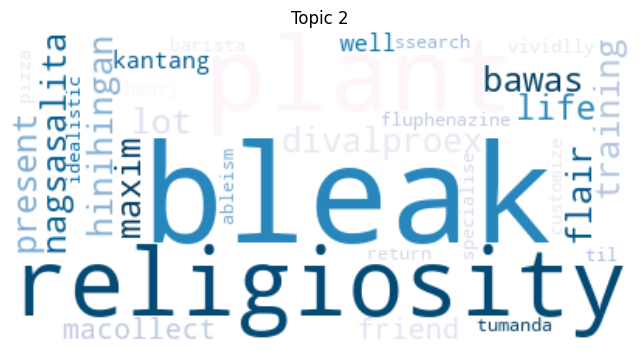

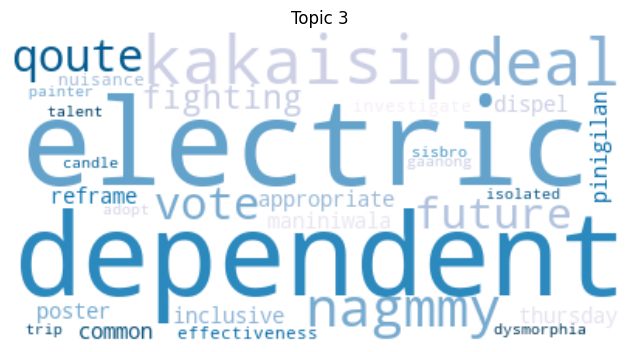

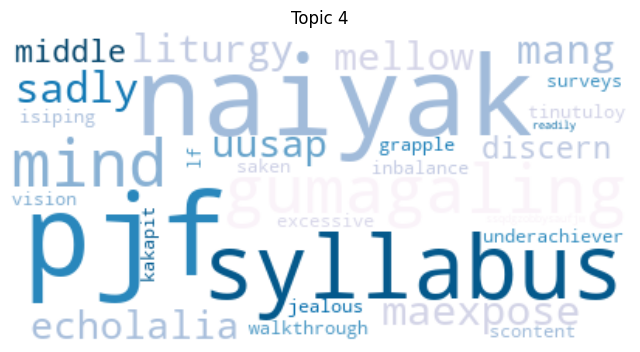

In [42]:
# Get the most probable words for each topic
topics = model_hdp.show_topics(num_topics=5, num_words=30, formatted=False)

# Create a word cloud for each topic
for topic_id, topic_words in topics:
    # Create a word cloud object
    wordcloud = WordCloud(background_color='white', colormap='PuBu')

    # Generate the word cloud from the topic words
    wordcloud.generate_from_frequencies(dict(topic_words))

    # Plot the word cloud
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_id}') #remove later
    plt.axis('off')

    # Show the plot
    plt.show()


### Topic assignment and distribution

In [44]:
# Infer the topic distribution for each document
doc_topics = model_hdp[corpus_to_bow]

In [75]:
# Create an empty list
list_topics = []

# Iterate over each document and topic distribution
for doc_id, doc in enumerate(doc_topics):
    for topic_id, prob in doc:
        # Append the document, topic, and probability as a dictionary
        list_topics.append({'Document': doc_id, 'Topic': topic_id, 'Probability': prob})

# Turn list into dataframe
df_topics = pd.DataFrame(list_topics)

# Convert the topic IDs to integers
df_topics['Topic'] = df_topics['Topic'].astype(int)

# Print the resulting DataFrame
print(df_topics)


      Document  Topic  Probability
0            0      0     0.127482
1            0      1     0.597161
2            0      2     0.113186
3            0      3     0.081463
4            0      4     0.080708
...        ...    ...          ...
2805       828      1     0.244676
2806       828      2     0.282323
2807       829      0     0.279364
2808       829      1     0.457009
2809       829      2     0.251562

[2810 rows x 3 columns]


In [80]:
# Find the index of the row with the highest probability for each document
idx = df_topics.groupby('Document')['Probability'].idxmax()

# Filter the DataFrame based on the index
df_topics_final = df_topics.loc[idx]

# Set new index
df_topics_final.set_index('Document', inplace=True)

# Print the resulting DataFrame
df_topics_final


,Topic,Probability
Document,,
0,1,0.597161
1,1,0.450047
2,1,0.458886
3,2,0.487669
4,1,0.664238
...,...,...
825,2,0.942387
826,2,0.788385
827,1,0.960728


In [81]:
df_topics_final.value_counts('Topic')

Topic
0    294
2    214
1    198
3     65
4     57
Name: count, dtype: int64

In [82]:
df_topics_final = pd.merge(text_df, df_topics_final, left_index=True, right_index=True)
df_topics_final

,title,num_comments,text,id,author,created_utc,score,upvote_ratio,url,flair,type,Topic,Probability
0,List of Centers Offering Free Online Psych Ser...,43,nan,nryig4,Pyjamaface,1.622789e+09,571,1.00,https://www.reddit.com/gallery/nryig4,INFORMATION,top,1,0.597161
1,List of Suggested PH-based Psychologists/Psych...,358,on making the first step on your road to reco...,vu31vp,groundbreakingswan24,1.657258e+09,323,1.00,https://www.reddit.com/r/MentalHealthPH/commen...,META,top,1,0.450047
2,I compiled some information for those looking ...,36,since a lot of people are looking for psychs i...,l0jnxs,gothicblossoms,1.611062e+09,250,1.00,https://www.reddit.com/r/MentalHealthPH/commen...,INFORMATION,top,1,0.458886
3,FINALLY GOT HIRED AFTER BEING UNEMPLOYED FOR 3...,40,even if I am super anxious to accept the job b...,j6t46u,Fentanyl223,1.602085e+09,248,1.00,https://www.reddit.com/r/MentalHealthPH/commen...,INSPIRATIONAL,top,2,0.487669
4,"[21F] Planned suicide, went to ER, sent to psy...",20,tw suicide posting this here and hoping this w...,vzhxj4,ilurv,1.657867e+09,222,0.99,https://www.reddit.com/r/MentalHealthPH/commen...,STORY,top,1,0.664238
...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,Does anybody else feel like they wouldnt do an...,15,i do not mean to be a debbie downer this new y...,eijouq,nobodyshere000,1.577894e+09,18,0.87,https://www.reddit.com/r/MentalHealthPH/commen...,NSFW,top,2,0.942387
826,Does commuting affect your mental health?,1,do you commute long hours to work or school ar...,e0ao8u,kn1212s,1.574471e+09,17,0.86,https://www.reddit.com/r/MentalHealthPH/commen...,SURVEY,top,2,0.788385
827,EXPRESS YOURSELF. DO NOT REPRESS,0,for any person here who wants an avenue to exp...,b22n2r,gennoboy,1.552806e+09,19,0.93,https://www.reddit.com/r/MentalHealthPH/commen...,NaN,top,1,0.960728
828,One of the worst part of mental health issues ...,21,after years of overachieving burnout hit me li...,13cjbgu,themaninthecloud,1.683620e+09,18,0.95,https://www.reddit.com/r/MentalHealthPH/commen...,DISCUSSION,top,0,0.466746


In [83]:
df_topics_final.to_csv('data/topics_top.csv')

### Saving and loading model

In [48]:
import pickle

# Save the trained HDA model
model_hdp.save('hdp_top_5.pkl')


In [84]:
import pickle

# Load the trained HDA model (for future use)
model_hdp = HdpModel.load('hdp_top_5.pkl')
